### Preparation of baseline data for comparison: PC-PH
The preparation of PCPH includes cutting the dataset to the same area of interest as done for SEVIRI, by cutting to the corner  pixel of the prepared SEVIRI dataset. This is followed by some visual tests as also tests if any timesteps are missing (which can happen!). Finally, the prepared dataset is saved.

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from tqdm.auto import tqdm, trange
from glob import glob
sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../src'))
from preprocessing_modules import find_nearest_pixelcoods

/bg/fast/env_wiegels-r/mambaforge/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Open prepared SEVIRI data
ds_seviri = xr.open_zarr('/pd/data/CML/seviri/test_wiegels/DE_06.zarr')

# Open prepared RADKLIM YW (radar) data
ds_yw = xr.open_dataset('data/ds_yw_202006')

<xarray.Dataset>
Dimensions:  (time: 14684, y: 180, x: 252)
Coordinates:
    LAT      (y, x) float32 45.91 45.91 45.91 45.91 ... 56.26 56.26 56.27 56.27
    LON      (y, x) float32 3.79 3.84 3.88 3.92 3.96 ... 18.21 18.26 18.32 18.38
  * time     (time) datetime64[ns] 2020-06-01T00:15:00 ... 2020-11-01
Dimensions without coordinates: y, x
Data variables:
    IR_016   (time, y, x) float64 dask.array<chunksize=(4, 180, 252), meta=np.ndarray>
    IR_039   (time, y, x) float64 dask.array<chunksize=(4, 180, 252), meta=np.ndarray>
    IR_087   (time, y, x) float64 dask.array<chunksize=(4, 180, 252), meta=np.ndarray>
    IR_097   (time, y, x) float64 dask.array<chunksize=(4, 180, 252), meta=np.ndarray>
    IR_108   (time, y, x) float64 dask.array<chunksize=(4, 180, 252), meta=np.ndarray>
    IR_120   (time, y, x) float64 dask.array<chunksize=(4, 180, 252), meta=np.ndarray>
    IR_134   (time, y, x) float64 dask.array<chunksize=(4, 180, 252), meta=np.ndarray>
    VIS006   (time, y, x) float64 dask.array<chunksize=(4, 180, 252), meta=np.ndarray>
    VIS008   (time, y, x) float64 dask.array<chunksize=(4, 180, 252), meta=np.ndarray>
    WV_062   (time, y, x) float64 dask.array<chunksize=(4, 180, 252), meta=np.ndarray>
    WV_073   (time, y, x) float64 dask.array<chunksize=(4, 180, 252), meta=np.ndarray>
Attributes:
    description:  coords with matrices

# PCPH

In [6]:
# open PCPH datasets
pcph = xr.open_dataset('/pd/data/CML/seviri/nc/pcph_2020/pcph_202006.nc')
# drop unneeded variables to save memory
ds_pcph = ds_pcph.drop_vars('pccond')
ds_pcph = ds_pcph.drop_vars('pcqual')

In [9]:
# choose only timesteps of test subset
ds_pcph_test = ds_pcph.where(ds_pcph.time==ds_yw_test.time, drop=True)

In [11]:
# Cut to needed extent in Germany
def cut_1(ds_yw_highres_cut, ds_pc):
    ll_y, ll_x = find_nearest_pixelcoods(ds_yw_highres_cut.LAT.isel(x=0, y=0).values, ds_yw_highres_cut.LON.isel(x=0, y=0).values, ds_pc.isel(time=0).LAT.values, ds_pc.isel(time=0).LON.values)
    ul_y, ul_x = find_nearest_pixelcoods(ds_yw_highres_cut.LAT.isel(x=0, y=-1).values, ds_yw_highres_cut.LON.isel(x=0, y=-1).values, ds_pc.isel(time=0).LAT.values, ds_pc.isel(time=0).LON.values)
    lr_y, lr_x = find_nearest_pixelcoods(ds_yw_highres_cut.LAT.isel(x=-1, y=0).values, ds_yw_highres_cut.LON.isel(x=-1, y=0).values, ds_pc.isel(time=0).LAT.values, ds_pc.isel(time=0).LON.values)
    ur_y, ur_x = find_nearest_pixelcoods(ds_yw_highres_cut.LAT.isel(x=-1, y=-1).values, ds_yw_highres_cut.LON.isel(x=-1, y=-1).values, ds_pc.isel(time=0).LAT.values, ds_pc.isel(time=0).LON.values)
    print(ll_y, ll_x, ul_y, ul_x, lr_y, lr_x, ur_y, ur_x)
    print(ds_pc.LAT.isel(x=ll_x, y=ll_y).values, ds_pc.LON.isel(x=ll_x, y=ll_y).values)
    print(ds_pc.LAT.isel(x=ul_x, y=ul_y).values, ds_pc.LON.isel(x=ul_x, y=ul_y).values)
    ds_pc_cut = ds_pc.where(ds_pc.x<=lr_x, drop=True)
    ds_pc_cut = ds_pc_cut.where(ds_pc_cut.x>=ll_x, drop=True) 
    ds_pc_cut = ds_pc_cut.where(ds_pc_cut.y<=ul_y, drop=True)
    ds_pc_cut = ds_pc_cut.where(ds_pc_cut.y>=ll_y, drop=True)
    return ds_pc_cut

ds_pcph_cut = cut_1(ds_yw, ds_pcph_test)

(300, 350) (300, 350) (300, 350)
(300, 350) (300, 350) (300, 350)
(300, 350) (300, 350) (300, 350)
(300, 350) (300, 350) (300, 350)
[78] [44] [257] [44] [78] [295] [257] [295]
[[[45.957035 45.957035 45.957035 ... 45.957035 45.957035 45.957035]]] [[[3.8389332 3.8389332 3.8389332 ... 3.8389332 3.8389332 3.8389332]]]
[[[55.83126 55.83126 55.83126 ... 55.83126 55.83126 55.83126]]] [[[4.858931 4.858931 4.858931 ... 4.858931 4.858931 4.858931]]]


In [12]:
# assign LAT, LON variables as coordinates
ds_pcph_cut = ds_pcph_cut.assign_coords({'LAT': ds_pcph_cut.LAT,'LON': ds_pcph_cut.LON})

### Check result

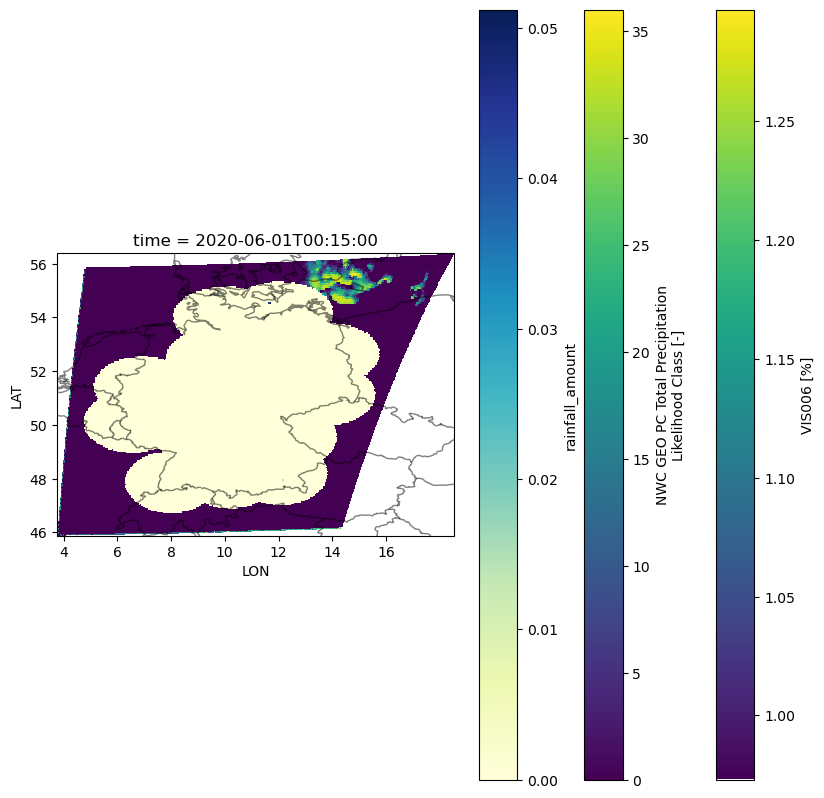

In [13]:
# plot both on map

t = '2020-06-01T00:15:00'
#t = '2021-06-21T06:00:00'
cmap = 'YlGnBu'
vmax = 30
extent = [3, 18, 45, 56]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, alpha=0.5)
ax.add_feature(cfeature.BORDERS, alpha=0.5)

xticks = np.arange(2, 18, 2)
yticks = np.arange(46, 58, 2)
ax.set_xticks(xticks)
ax.set_yticks(yticks)

ds_seviri_06.VIS006.sel(time=t).plot(
    x='LON', 
    y='LAT',

)



ds_pcph_cut.pcph.isel(time=0).plot(
        x='LON', 
        y='LAT',

)
    
ds_yw.rainfall_amount.sel(time=t).plot(
    x='LON',
    y='LAT',
    transform=ccrs.PlateCarree(),
    cmap=cmap,

)

plt.show()

In [14]:
# check which timestamps are missing with https://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.DatetimeIndex.difference.html#pandas-datetimeindex-difference
pd_yw_test = pd.Index(ds_yw_test.time.values)
pd_pcph = pd.Index(ds_pcph_cut.time.values)

print(pd_yw_test.difference(pd_pcph).values)
print(pd_pcph.difference(pd_yw_test).values)


[]
[]


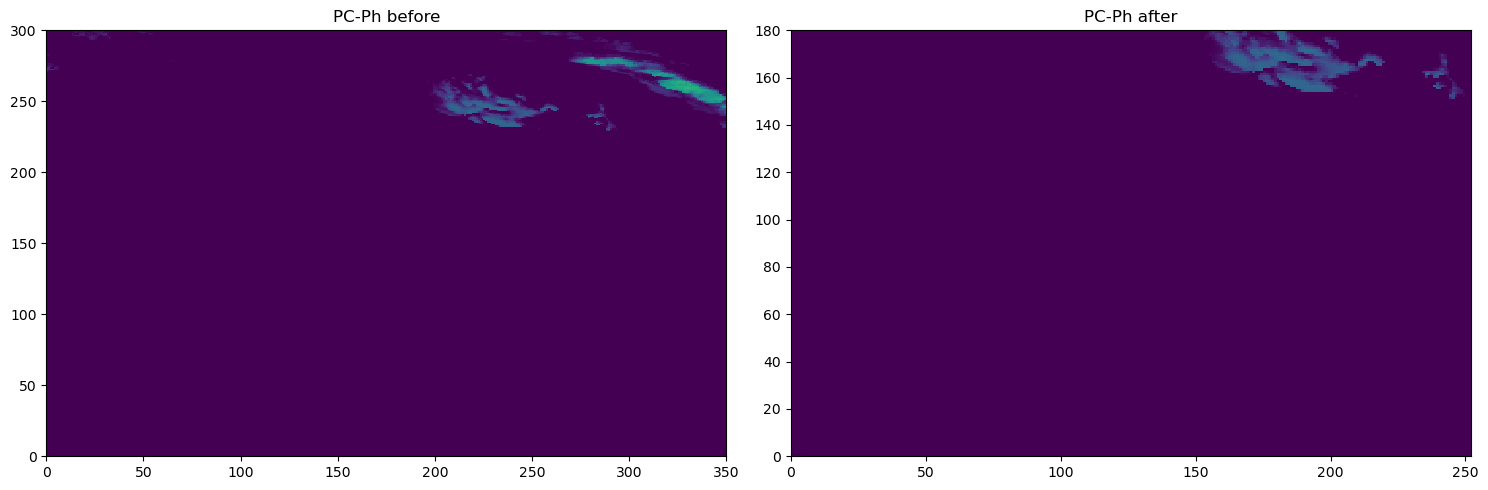

In [15]:
# Check if everything worked
i='2020-06-23T00:15:00.000000000'
#print(ds_pcph.time.isel(time=i).values, ds_pcph_cut.isel(time=i).values)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].pcolormesh(ds_pcph.pcph.sel(time=i), vmin=0, vmax=100)
ax[0].set_title('PC-Ph before')
ax[1].pcolormesh(ds_pcph_cut.pcph.sel(time=i), vmin=0, vmax=100)
ax[1].set_title('PC-Ph after')

plt.tight_layout()
plt.show()

### Save final pcph subset

In [ ]:
# save final pcph data set for testing
ds_pcph_cut.to_netcdf('data/pcph/ds_pcph_cut.nc', encoding={'pcph': {'zlib': True}})